In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import scipy.sparse.linalg
from scipy.spatial.distance import pdist, squareform

import csv

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)

## 1. Import data

In [2]:
tracks = pd.read_csv("data/fma_metadata/tracks.csv", header=[0,1], index_col=0)
tracks.index.rename("track_id", inplace=True)
tracks

album                                                            \
         comments         date_created        date_released        engineer   
track_id                                                                      
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00             NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
26              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
30              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
46              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
48              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
134             0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
135             1  2008-11-26 01:49:19  2009-01-07 00:00:00             NaN   
136             1  2008-11-26 01:49:19  2009-01-07 00:00:00             NaN   
137             1  2008-11-26 01:49:35  2006-12-01 00:00:00             NaN   
138             1  2008-11-26 01:49:35  2006-12-01 00:00:00             NaN   
139             0  2008-11-26 01:49:57  2009-01-16 00:00:00             NaN   
140             1  2008-11-26 01:49:59  2007-05-22 00:00:00             NaN   
141             0  2008-11-26 01:49:57  2009-01-16 00:00:00             NaN   
142             0  2008-11-26 01:50:03  2005-01-25 00:00:00             NaN   
144             0  2008-11-26 01:50:07  2009-01-06 00:00:00             NaN   
145             0  2008-11-26 01:50:07  2009-01-06 00:00:00             NaN   
146             0  2008-11-26 01:50:13  1995-01-01 00:00:00             NaN   
147             0  2008-11-26 01:50:13  1995-01-01 00:00:00             NaN   
148             0  2008-11-26 01:50:19  2009-01-15 00:00:00             NaN   
149             0  2008-11-26 01:50:25  2009-01-09 00:00:00             NaN   
150             0  2008-11-26 01:50:25  2009-01-09 00:00:00             NaN   
151             0  2008-11-26 01:50:46  2009-01-06 00:00:00             NaN   
152             0  2008-11-26 01:50:46  2009-01-06 00:00:00             NaN   
153             0  2008-11-26 01:50:50  2005-06-07 00:00:00             NaN   
154             0  2008-11-26 01:50:50  2005-06-07 00:00:00             NaN   
155             0  2008-11-26 01:51:00  2009-01-06 00:00:00             NaN   
...           ...                  ...                  ...             ...   
155290          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155291          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155292          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155293          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155294          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155295          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155296          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155297          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155298          0  2017-03-30 10:45:13                  NaN             NaN   
155299          0  2017-03-30 10:45:13                  NaN             NaN   
155300          0  2017-03-30 10:45:13                  NaN             NaN   
155301          0  2017-03-30 10:45:13                  NaN             NaN   
155302          0  2017-03-30 10:45:13                  NaN             NaN   
155303          0  2017-03-30 10:45:13                  NaN             NaN   
155304          0  2017-03-30 10:45:13                  NaN             NaN   
155305          0  2017-03-30 10:45:13                  NaN             NaN   
155306          0  2017-03-30 10:45:13                  NaN   

In [4]:
genres = pd.read_csv("data/fma_metadata/genres.csv", index_col=0)
genres

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
6,914,38,Novelty,38
7,217,20,Comedy,20
8,868,0,Old-Time / Historic,8
9,1987,0,Country,9


In [48]:
genres.sort_values('#tracks', ascending=False)

,genre_id,#tracks,parent,title,top_level
31,38,38154,0,Experimental,38
14,15,34413,0,Electronic,15
11,12,32923,0,Rock,12
162,1235,14938,0,Instrumental,1235
9,10,13845,0,Pop,10
16,17,12706,0,Folk,17
22,25,9261,12,Punk,12
0,1,8693,38,Avant-Garde,38
20,21,8389,0,Hip-Hop,21
27,32,7268,38,Noise,38


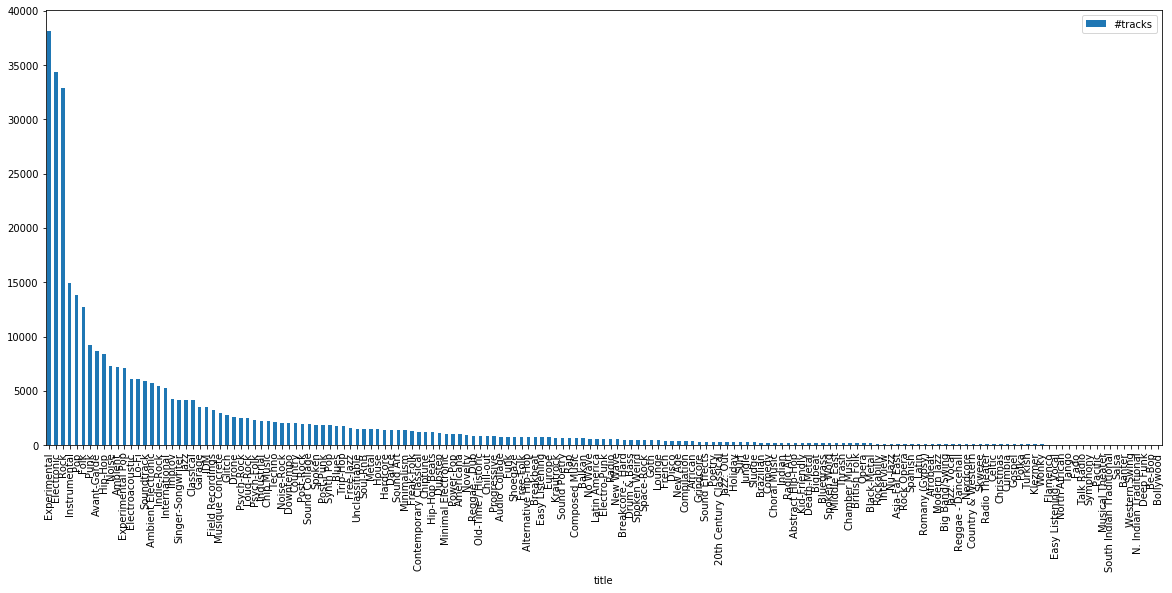

In [47]:
genres.sort_values('#tracks', ascending=False)[['#tracks', 'title']].set_index('title').plot(kind='bar', figsize=(20,8))
plt.show()

In [5]:
echonest = pd.read_csv("data/fma_metadata/echonest.csv", header=[0,1], skiprows=[0], index_col=0)
echonest.index.rename("track_id", inplace=True)
echonest

audio_features                                                    \
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476     1.062807e-02  0.177647   
3              0.374408     0.528643  0.817461     1.851103e-03  0.105880   
5              0.043567     0.745566  0.701470     6.967990e-04  0.373143   
10             0.951670     0.658179  0.924525     9.654270e-01  0.115474   
134            0.452217     0.513238  0.560410     1.944269e-02  0.096567   
139            0.106550     0.260911  0.607067     8.350870e-01  0.223676   
140            0.376312     0.734079  0.265685     6.695811e-01  0.085995   
141            0.963657     0.435933  0.075632     3.454935e-01  0.105686   
142            0.662881     0.379065  0.823856     9.102662e-01  0.088705   
144            0.909011     0.443643  0.641997     9.240917e-01  0.267669   
145            0.235506     0.438672  0.487752     7.161218e-01  0.070359   
146            0.532019     0.417681  0.476422     4.025004e-01  0.172105   
147            0.778410     0.706681  0.866116     8.067026e-01  0.104650   
153            0.988306     0.255661  0.979774     9.730057e-01  0.121342   
154            0.970135     0.352946  0.023852     9.571129e-01  0.113261   
155            0.981657     0.142249  0.912122     9.672940e-01  0.363510   
169            0.989141     0.225978  0.722835     2.630763e-01  0.092371   
170            0.886660     0.298518  0.744333     9.209505e-01  0.139587   
171            0.698278     0.285816  0.213494     9.556913e-01  0.087036   
172            0.815549     0.144125  0.892721     9.004301e-01  0.104703   
173            0.842113     0.285293  0.564689     9.516243e-01  0.110481   
174            0.367393     0.339698  0.846639     9.091862e-01  0.198944   
175            0.993928     0.310090  0.952493     2.743115e-01  0.354231   
176            0.833516     0.206509  0.779140     9.408411e-01  0.372311   
177            0.754275     0.209113  0.579959     7.368654e-01  0.112165   
178            0.995553     0.186146  0.413054     9.551374e-01  0.111716   
179            0.958873     0.274609  0.989482     9.193623e-01  0.546516   
189            0.993670     0.622578  0.216907     9.728700e-01  0.110989   
190            0.990629     0.500753  0.371230     1.028384e-01  0.218810   
191            0.982464     0.286557  0.238348     9.429369e-01  0.097493   
...                 ...          ...       ...              ...       ...   
124720         0.010478     0.652483  0.657498     7.098000e-07  0.701523   
124721         0.067906     0.432421  0.764508     1.625500e-06  0.104412   
124722         0.153518     0.638660  0.762567     5.000000e-10  0.264847   
124765         0.000211     0.567435  0.828482     8.325934e-01  0.156178   
124775         0.000278     0.616914  0.717437     8.492477e-01  0.140324   
124784         0.233774     0.659206  0.623716     9.158724e-01  0.115816   
124788         0.182181     0.660494  0.872243     8.902695e-01  0.134982   
124796         0.987265     0.153698  0.238490     8.129657e-01  0.184972   
124797         0.992387     0.606253  0.014608     9.611720e-01  0.082341   
124808         0.166146     0.662129  0.651307     8.719606e-01  0.632039   
124809         0.027364     0.548749  0.746274     5.326332e-01  0.262746   
124810         0.035736     0.659453  0.823882     7.123611e-01  0.388225   
124812         0.056318     0.656891  0.692750     2.532737e-01  0.252465   
124814         0.053750     0.659175  0.736589     8.930654e-01  0.093664   
124817         0.020151     0.539219  0.861178     6.500456e-01  0.503604   
124818         0.092864     0.646080  0.772000     5.690692e-01  0.442961   
124819         0.212196     0.691758  0.801736     4.266291e-01  0.231404   
124820         0.059584     0.702435  0.622037     9.950796e-02  0.236370   
12485

In [6]:
tracks.loc[echonest.index].track.genre_top.value_counts()

Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Name: genre_top, dtype: int64

In [239]:
def normalized(array):
    return (array - array.min()) / (array.max() - array.min())

## 2. Only with audio features on the small dataset

In [366]:
audio_features = pd.read_csv("data/fma_metadata/features.csv", header=[0,1,2], index_col=0)
audio_features.index.rename("track_id", inplace=True)
audio_features

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
26           -0.699535 -0.684158  0.048825  0.042659 -0.818967 -0.917123   
30           -0.721487 -0.848560  0.890904  0.088620 -0.445513 -1.271170   
46           -0.119708 -0.858814  2.362546  0.106584 -1.315912 -1.220354   
48           -1.054053  0.932339  0.528064 -1.035338 -1.000682 -1.119304   
134           0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   
135           0.978402  0.623572  1.129261 -1.043970 -1.127288 -0.032642   
136           0.915001 -0.643476 -0.460507 -0.530701 -0.364460 -0.226860   
137           1.607191  1.199649  0.745765  1.430835 -0.155455  0.768487   
138           1.501403  0.957514  1.276685  0.640389  0.442936  0.845533   
139          -0.020869  0.432330  0.331278  0.829845  2.625593  2.005660   
140           0.533579 -0.623885 -1.086205 -1.081079 -0.765151 -0.072282   
141           0.172898 -0.284804 -1.169662 -1.062855 -0.706868 -0.708281   
142          -0.581270  3.199484  1.298346 -0.681253 -0.935093 -0.960304   
144           0.121207 -0.025308  0.541327  0.967687  1.082456  1.675841   
145           0.954054  0.315324  0.015383 -0.023933  0.086671  1.279086   
146          -0.763713 -0.342105 -0.273965  0.729047 -0.649717  0.109572   
147           0.011158  0.069270  1.552282 -0.251362  0.158631  0.071886   
148          -0.453950 -0.922267 -0.845767 -1.059609 -0.164252 -0.428238   
149          -0.386733 -0.545598 -0.638649 -0.669786 -0.522530 -0.809405   
150          -0.083043  0.142131 -0.466703  1.447829 -0.324532  0.098253   
151           2.679700  1.564581  1.628766  1.574172  2.461945  4.033635   
152          -0.510457  1.649074  0.340847  0.389235 -0.371745  1.578730   
153           2.437779  0.886211  2.899974  1.726185  1.248919  0.676350   
154          40.440720 -0.251259  0.685472 -0.670811 -1.223815  1.275721   
155           0.161195  1.580878 -0.200231  0.216993  0.196968 -0.442953   
...                ...       ...       ...       ...       ...       ...   
155290       -1.256915 -1.194825 -1.353125 -0.532530 -1.404040 -0.995579   
155291       -1.543836 -1.320838 -1.199663 -0.006909 -1.160004 -0.326463   
155292       -0.955190 -0.879837  0.480942  2.266221 -0.899861 -0.904715   
155293        0.116289 -0.728864 -0.404994  0.000208 -0.377840 -0.198419   
155294       -1.052930 -0.875463  0.108331 -1.031980 -1.257848 -1.403183   
155295       -1.855166 -1.843082  6.121086  4.632593  5.402946  8.081429   
155296       -1.181767 -0.953902 -0.767223 -0.960635 -1.507767 -0.655886   
155297       -0.007668  0.104604 -0.511487  0.857308  0.266202 -0.355186   
155298       -0.956019 -0.961210 -0.447053 -0.689531 -0.633071 -0.430116   
155299       -0.378812 -0.692087 -0.869693 -0.862368  0.000357  0.103398   
155300       -0.590855 -0.228609 -0.592955 -0.585120 -0.613510  1.489933   
155301       -0.749575 -0.742979 -0.218289  0.134936  0.882519  0.471344   
155302       -0.732580 -0.203825 -0.883129 -0.393307 -0.742957 -0.767015   
155303       -0.846720 -1.161092 -0.724193 -0.604951 -1.066579 -1.133118   
155304       -0.420769 -0.099274 -0.251443  0.932526  0.313478  0.347822   
155305       -0.832872 -0.809870 -0.601314 -0.343021 -0.922507 -0.550964   
155306        0.644815 -0.879404 -1.149232 -0.655986 -0.848881 -0.672240   
155307       -0.446937  1.235004 -0.250855 -0.61

In [367]:
id_small = (tracks.set.subset == 'small')
features_small = audio_features[id_small]
features_small

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
140           0.533579 -0.623885 -1.086205 -1.081079 -0.765151 -0.072282   
141           0.172898 -0.284804 -1.169662 -1.062855 -0.706868 -0.708281   
148          -0.453950 -0.922267 -0.845767 -1.059609 -0.164252 -0.428238   
182           0.300352  1.075603 -0.464930  0.145206 -0.310866  1.141097   
190          -0.326067 -0.849603 -0.829708 -0.807827 -1.176002 -0.662898   
193          -0.308888 -1.054326 -0.102362 -0.638125 -0.811252 -0.612962   
194          -0.803457 -0.146634 -1.123406 -1.040201 -1.234728 -0.999059   
197          -1.064454 -1.141880 -0.116212 -1.122205 -0.797917 -0.810862   
200          -1.218976  0.865863 -1.406675  2.389059 -1.551505 -0.578557   
203          -0.765698 -1.201390 -0.748472 -0.644162 -0.832776 -0.952697   
204          -0.952763 -0.128642 -0.424757 -0.475148 -0.432873 -0.240849   
207          -1.176386 -0.744855 -0.237885 -1.208433 -1.239303 -0.834120   
210          -1.139867 -0.765117 -0.398347 -0.873563  0.298781 -0.531524   
211          -0.340395 -0.202638 -0.216030 -0.078217  0.550447 -0.636939   
212           1.425728 -0.730105 -0.893947 -0.900159  1.302656 -0.584388   
213          -0.908635 -0.206624 -0.286328 -0.557623  0.413858 -0.088887   
255           0.114022  1.043898  0.171339  0.119401  0.344436  0.085586   
256           0.045324  5.285462 -0.347695 -0.216278 -0.554277 -0.322547   
368           1.227293  1.407863  0.113506  3.899308  4.060197  3.048976   
424          -0.119707 -0.904231  0.604607 -0.991894  1.903831 -0.376343   
459           1.551306 -1.021888 -0.378807 -0.620683 -0.928914 -0.913499   
534          -0.363953 -0.734606  0.435940  0.085379  1.628014 -0.296006   
540           0.294533 -0.171833  0.294257  0.172662  0.694958  0.706916   
546           0.149045  0.415505 -0.076961 -0.215612  0.669312  0.491404   
574           0.242732  0.725443  1.167472 -0.392548  3.399552  0.213584   
602          -0.490929 -0.681323 -1.226509 -0.977671 -0.876011 -0.452854   
615          -0.683970 -1.506194 -1.520676 -1.617963 -1.151320  0.109696   
...                ...       ...       ...       ...       ...       ...   
152103       -1.214910 -0.499429 -0.725443 -0.709036  3.842811 -0.021689   
152253        1.023213 -1.198199 -1.284585 -1.412415  0.877921 -1.128107   
152254       -1.066338  1.132923  0.732445  1.589286  4.556279  0.976990   
152258       -1.718295 -1.349174 -0.269601  1.523518 -1.437191 -1.681459   
152261        1.089100  4.346756  4.196738 -1.218650 -1.077704 -0.861304   
152262       -0.941473 -0.548233 -0.140433  0.402291 -0.718873 -0.605621   
152324        0.045014 -0.781914  2.757598  0.210317 -0.642753 -0.391262   
152418       -0.513663  0.514926  0.369615 -0.496987  0.054377 -0.233966   
152425       -0.272053 -0.030192 -0.200227 -0.300687 -0.119135 -0.153995   
152480       -0.752576  0.358721 -1.025897 -0.818031 -0.825976 -0.890393   
152543        0.326404 -0.324184 -0.475536 -0.776703 -0.817175 -0.037442   
152545       -0.541732  0.060137 -0.763223 -0.483506 -0.656409 -0.668960   
152568       -1.127759 -0.881541 -0.499223  0.328376 -0.119855  0.607589   
152569       -0.943925 -1.113387 -0.194326 -0.172211 -0.317384  0.248695   
152570        0.820893 -0.454411 -0.692420  0.632688 -0.591388  0.354077   
153337       -0.701342 -0.907655 -1.208627 -0.886087 -0.178667  0.066941   
153383        2.054386  3.407671  2.099759  0.309273 -0.703746 -0.621597   
153452       -0.513516 -0.259959 -0.983969 -0.81

In [368]:
# use min-max normalization to rescale all features between 0 and 1
features_scaled = normalized(features_small)
features_scaled.describe()

feature     chroma_cens                                                      \
statistics     kurtosis                                                       
number               01           02           03           04           05   
count       8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean           0.042888     0.022351     0.003904     0.062889     0.040912   
std            0.037093     0.023705     0.011703     0.045910     0.036223   
min            0.000000     0.000000     0.000000     0.000000     0.000000   
25%            0.024811     0.013285     0.002185     0.037818     0.023429   
50%            0.035320     0.018726     0.003099     0.053236     0.033490   
75%            0.049921     0.026266     0.004381     0.074786     0.048002   
max            1.000000     1.000000     1.000000     1.000000     1.000000   

feature                                                                      \
statistics                                                                    
number               06           07           08           09           10   
count       8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean           0.036403     0.017491     0.009897     0.023788     0.024198   
std            0.032431     0.020269     0.015664     0.023724     0.025548   
min            0.000000     0.000000     0.000000     0.000000     0.000000   
25%            0.020727     0.010109     0.005508     0.014003     0.013684   
50%            0.030159     0.014281     0.007893     0.019602     0.019728   
75%            0.043185     0.020427     0.011442     0.027879     0.028202   
max            1.000000     1.000000     1.000000     1.000000     1.000000   

feature        ...           tonnetz                                    zcr  \
statistics     ...               std                               kurtosis   
number         ...                04           05           06           01   
count          ...       8000.000000  8000.000000  8000.000000  8000.000000   
mean           ...          0.336363     0.298250     0.236978     0.021156   
std            ...          0.139426     0.111948     0.089444     0.044624   
min            ...          0.000000     0.000000     0.000000     0.000000   
25%            ...          0.233180     0.216801     0.172148     0.003958   
50%            ...          0.319693     0.280626     0.224934     0.008924   
75%            ...          0.420862     0.363316     0.290131     0.021611   
max            ...          1.000000     1.000000     1.000000     1.000000   

feature                                                                      \
statistics          max         mean       median          min         skew   
number               01           01           01           01           01   
count       8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean           0.375527     0.075643     0.055439     0.014646     0.170214   
std            0.191839     0.045488     0.036130     0.027439     0.075680   
min            0.000000     0.000000     0.000000     0.000000     0.000000   
25%            0.236869     0.046189     0.032573     0.000000     0.122398   
50%            0.347475     0.068052     0.048860     0.005714     0.149847   
75%            0.465152     0.094670     0.069707     0.020000     0.197870   
max            1.000000     1.000000     1.000000     1.000000     1.000000   

feature                  
statistics          std  
number               01  
count       8000.000000  
mean           0.119876  
std            0.082090  
min            0.000000  
25%            0.063481  
50%            0.099111  
75%            0.155003  
max            1.000000  

[8 rows x 518 columns]

In [369]:
#distances = pdist(features_scaled.values, metric='euclidean')
distances = pdist(features_small.values, metric='cosine')
distances

array([0.0017504 , 0.00840525, 0.00412301, ..., 0.00276427, 0.01702406,
       0.01253683])

In [379]:
#kernel_width = int(distances.mean())
#weights = np.exp(-distances**2 / kernel_width**2)
#weights = normalized(distances)
weights = 1 - distances/2

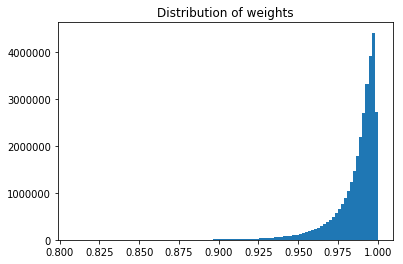

In [380]:
plt.hist(weights, bins=100)
plt.title('Distribution of weights')
plt.show()

In [386]:
adjacency = squareform(weights)
threshold = 0.999
adjacency[adjacency < threshold] = 0
#threshold = 1e-3
#adjacency[adjacency > threshold] = 0

In [387]:
print("Number of edges :", (adjacency!=0).sum())

Number of nodes : 7782
Number of edges : 1645574


In [388]:
G = nx.from_numpy_array(adjacency)

In [389]:
coords = nx.spring_layout(G) 

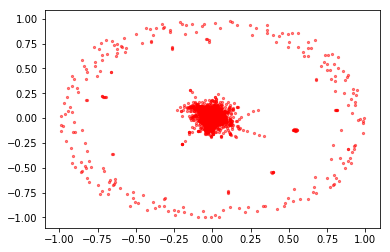

In [390]:
nx.draw_networkx_nodes(G, coords, node_size=5, alpha=0.5)
#nx.draw_networkx_edges(g, c, alpha=0.3)

In [436]:
nx.set_edge_attributes(G, name="distance", values={ k:(1-v) for (k,v) in nx.get_edge_attributes(G, "weight").items() })

In [437]:
gc_nodes = list(max(nx.connected_components(G), key=len))

adjacency_gc = adjacency[gc_nodes][:,gc_nodes]
GC = nx.from_numpy_matrix(adjacency_gc)

In [438]:
len(gc_nodes)

7719

In [439]:
coords_gc = nx.spring_layout(GC)

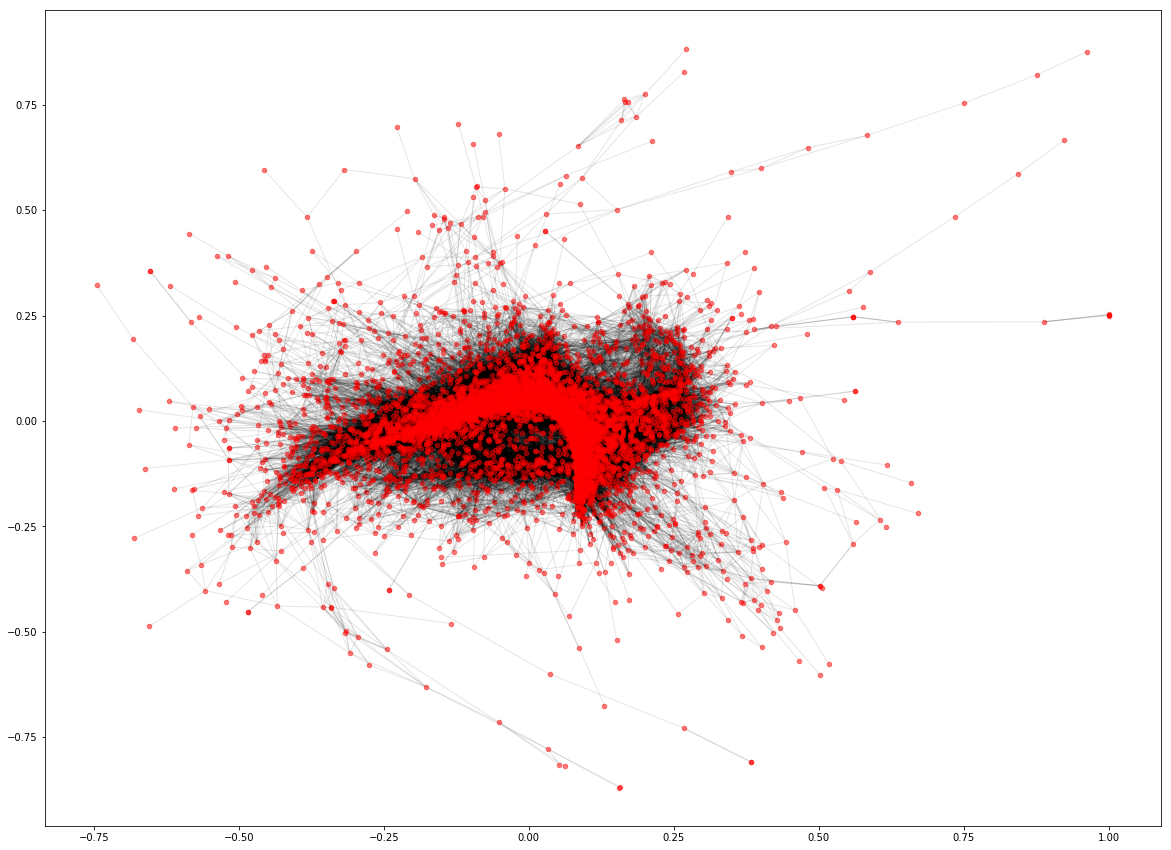

In [440]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(GC, coords_gc, node_size=20, alpha=0.5)
nx.draw_networkx_edges(GC, coords_gc, alpha=0.1)

In [441]:
genre_labels = tracks[id_small].track.genre_top.iloc[gc_nodes]

In [442]:
genre_labels.value_counts()

Hip-Hop          990
Rock             984
Pop              982
Folk             978
International    964
Electronic       959
Instrumental     951
Experimental     911
Name: genre_top, dtype: int64

In [443]:
numeric_labels = genre_labels.astype('category').cat.codes

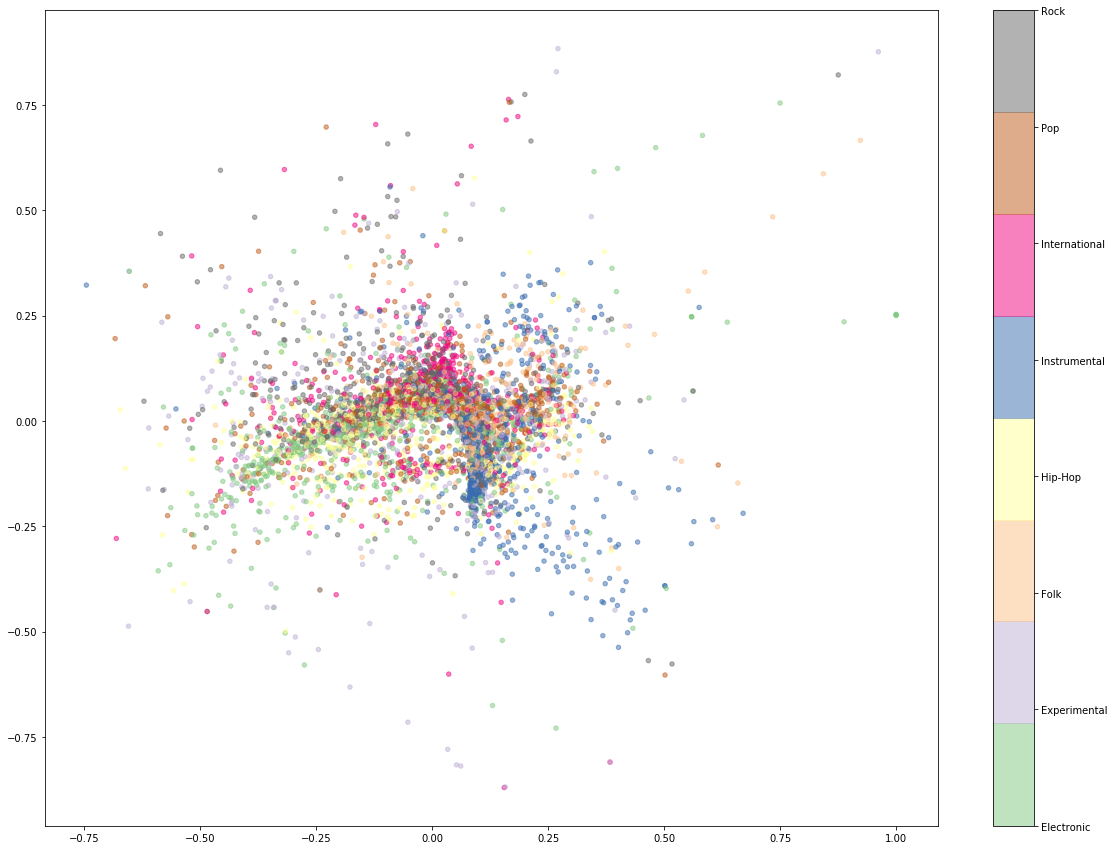

In [469]:
plt.figure(figsize=(20,15))
nodes = nx.draw_networkx_nodes(GC, coords_gc, node_size=20, node_color=numeric_labels, alpha=0.5, cmap='Accent')
#nx.draw_networkx_edges(GC, coords_gc, alpha=0.1)
cbar = plt.colorbar(nodes)
cbar.ax.set_yticklabels(genre_labels.astype('category').cat.categories)
plt.show()

In [445]:
gc_tracks = tracks[id_small].iloc[gc_nodes]

In [446]:
for a in gc_tracks.artist.name.unique():
    print(a)

AWOL
Kurt Vile
Alec K. Redfearn & the Eyesores
Contradiction
Ariel Pink's Haunted Graffiti
Ed Askew
Au
Bird Names
Black Elk
Blah Blah Blah
Brian Joseph Davis
CAVE
Charles Manson
Clockcleaner
Dora Bleu
EKG
Explode Into Colors
Fanatic
Flying Luttenbachers
Food For Animals
Fósforo
Fursaxa
Glove Compartment
Hall Of Fame
Hecuba
Here Comes A Big Black Cloud!!
Hutzl Ukranian Ensemble
Ilyas Ahmed
Infinite Body
Jad Fair and Jason Willett
Kevin Shields
Lightning Bolt
Lucky Dragons
M. Nguyen Van Minh-Con
Magic Lantern
Mahjongg
Mary Halvorson and Weasel Walter
Mount Eerie
Nautical Almanac
Necropolis
Negativland
Pierced Arrows
Plastic Crimewave Sound
Pocahaunted
Rainbro
Ric Royer &amp; G. Lucas Crane
Samara Lubelski
So Cow
Softboiled Eggies
Solemn Man
The Sounds of Taraab
Spires That in the Sunset Rise
Strapping Fieldhands
Sun Araw
Teeth Mountain
The Yolks
Tommy Jay
The Twin Atlas
U.S. Girls
Upsilon Acrux
White Mice
Grouper
luc
Ai Aso
Arborea
Citay
Cryptacize
Dan Deacon
Fallen Leaves
Gary Higgins
I

In [447]:
np.argwhere(gc_tracks.artist.name == 'Mudhoney')

array([[3598],
       [3599]])

In [448]:
np.argwhere(gc_tracks.artist.name == 'Protomartyr')

array([[4142]])

In [449]:
start_track = 3598
end_track = 4142

In [450]:
playlist = nx.astar_path(GC, start_track, end_track, weight='distance')
playlist

[3598, 0, 1, 393, 116, 5592, 4142]

In [410]:
nx.dijkstra_path(GC, start_track, end_track)

[3598, 7675, 5683, 2976, 1910, 5080, 4142]

In [451]:
gc_tracks[[('track', 'title'),('artist','name'),('track','genre_top')]].iloc[playlist]

,track,artist,track
,title,name,genre_top
track_id,,,
84290,Slipping Away,Mudhoney,Rock
2,Food,AWOL,Hip-Hop
5,This World,AWOL,Hip-Hop
9559,Mississippi Kite,Kristin Hersh,Rock
1925,Happy At The Wheel,The Twin Atlas,Folk
120298,Attic,Cory Gray,Instrumental
96759,Maidenhead,Protomartyr,Rock


## 3. With all 3 datasets on echonest tracks

In [473]:
top8genres = tracks.track.genre_top.loc[echonest.index].value_counts().head(8).index.values

In [477]:
sub_echonest = echonest.loc[tracks.track.genre_top.loc[echonest.index].isin(top8genres)]

In [478]:
echonest_features_scaled = normalized(audio_features.loc[sub_echonest.index])

In [479]:
echonest_audio_scaled = normalized(sub_echonest.audio_features)

In [480]:
echonest_temporal_scaled = normalized(sub_echonest.temporal_features)

In [482]:
echonest_features_scaled.columns[echonest_features_scaled.isna().any()]

MultiIndex(levels=[['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse', 'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast', 'spectral_rolloff', 'tonnetz', 'zcr'], ['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']],
           labels=[[2, 2], [1, 1], [4, 9]],
           names=['feature', 'statistics', 'number'])

In [483]:
echonest_features_scaled.dropna(axis=1, inplace=True)

In [484]:
temporal_cos_dist    = pdist(echonest_temporal_scaled.values, metric='cosine')
temporal_euclid_dist = pdist(echonest_temporal_scaled.values, metric='euclidean')
audio_cos_dist       = pdist(echonest_audio_scaled.values, metric='cosine')
audio_euclid_dist    = pdist(echonest_audio_scaled.values, metric='euclidean')
features_cos_dist    = pdist(echonest_features_scaled.values, metric='cosine')
features_euclid_dist = pdist(echonest_features_scaled.values, metric='euclidean')

In [485]:
temporal_cos_dist    = normalized(temporal_cos_dist)
temporal_euclid_dist = normalized(temporal_euclid_dist)
audio_cos_dist       = normalized(audio_cos_dist)
audio_euclid_dist    = normalized(audio_euclid_dist)
features_cos_dist    = normalized(features_cos_dist)
features_euclid_dist = normalized(features_euclid_dist)

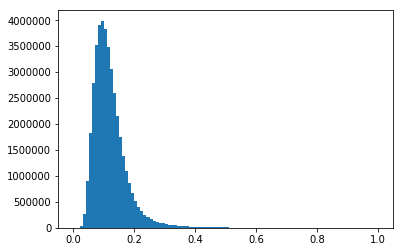

In [490]:
plt.hist(temporal_cos_dist, bins=100)
plt.show()

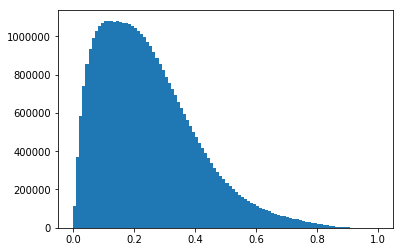

In [653]:
plt.hist(audio_cos_dist, bins=100)
plt.show()

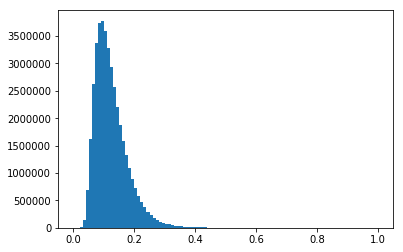

In [493]:
plt.hist(features_cos_dist, bins=100)
plt.show()

In [1826]:
temporal_coeff = 1
audio_coeff = 0
features_coeff = 0

In [1850]:
distances = temporal_coeff*temporal_cos_dist + audio_coeff*audio_cos_dist + features_coeff*features_cos_dist

In [1177]:
distances = temporal_coeff*temporal_euclid_dist + audio_coeff*audio_euclid_dist + features_coeff*features_euclid_dist

In [1116]:
# use a gaussian repartition of inverse distances
# kernel_width = int(distances.mean())
# weights = np.exp(-distances**2 / kernel_width**2)

In [1156]:
# normalize distances
# weights = (distances - distances.min()) / (distances.max() - distances.min())

In [1851]:
# use opposite of distances as weights
weights = 1 - distances

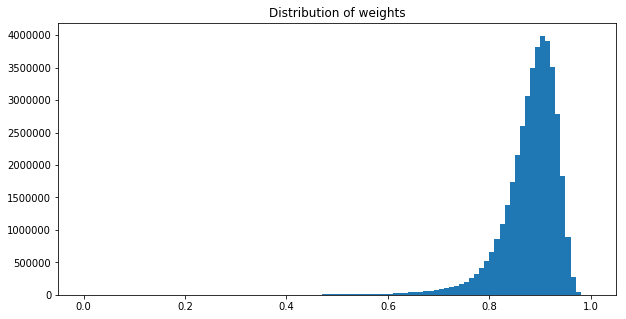

In [1852]:
plt.hist(weights, bins=100)
plt.title('Distribution of weights')
plt.show()

In [1834]:
adjacency = squareform(weights)
threshold = 0.96
adjacency[adjacency < threshold] = 0
#threshold = 0.075
#adjacency[adjacency > threshold] = 0

In [1835]:
print("Number of edges :", (adjacency!=0).sum())

Number of edges : 612670


In [1862]:
adjacency[adjacency!=0].min()

0.9600000004824089

In [1836]:
G = nx.from_numpy_array(adjacency)

In [1837]:
n_nodes = G.number_of_nodes()

In [1838]:
#gc_nodes = list(max(nx.connected_components(G), key=len))
#len(gc_nodes)

In [1839]:
#adjacency_gc = adjacency[gc_nodes][:,gc_nodes]
#GC = nx.from_numpy_array(adjacency_gc)

In [1840]:
GC = max(nx.connected_component_subgraphs(G), key=len)

In [1841]:
GC.number_of_nodes()

7387

In [1842]:
gc_nodes = np.asarray(GC.nodes)

In [1843]:
nx.set_edge_attributes(GC, name="distance", values={ k:(1-v) for (k,v) in nx.get_edge_attributes(GC, "weight").items() })

In [1844]:
laplacian = nx.normalized_laplacian_matrix(GC)

In [1845]:
eigvals, U = scipy.linalg.eigh(laplacian.todense())

In [1371]:
coords_gc = nx.spring_layout(GC)

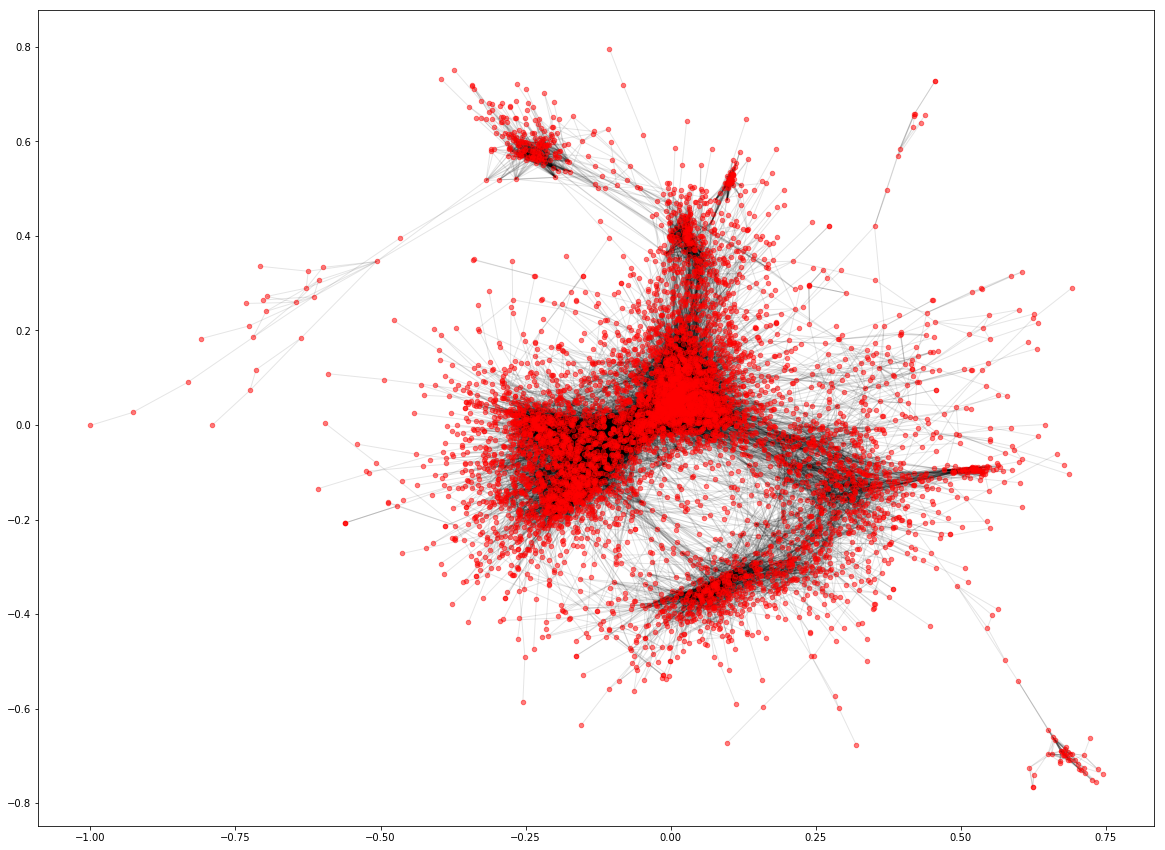

In [1372]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(GC, coords_gc, node_size=20, alpha=0.5)
nx.draw_networkx_edges(GC, coords_gc, alpha=0.1)

In [1373]:
sub_tracks = tracks.loc[sub_echonest.index]
gc_tracks = sub_tracks.iloc[gc_nodes]

In [1374]:
genre_labels = gc_tracks.track.genre_top

In [1375]:
genre_labels.value_counts()

Rock                   3152
Electronic             1138
Hip-Hop                 626
Folk                    495
Old-Time / Historic     279
Pop                     248
Classical               195
Jazz                    187
Name: genre_top, dtype: int64

In [1376]:
numeric_labels = genre_labels.astype('category').cat.codes

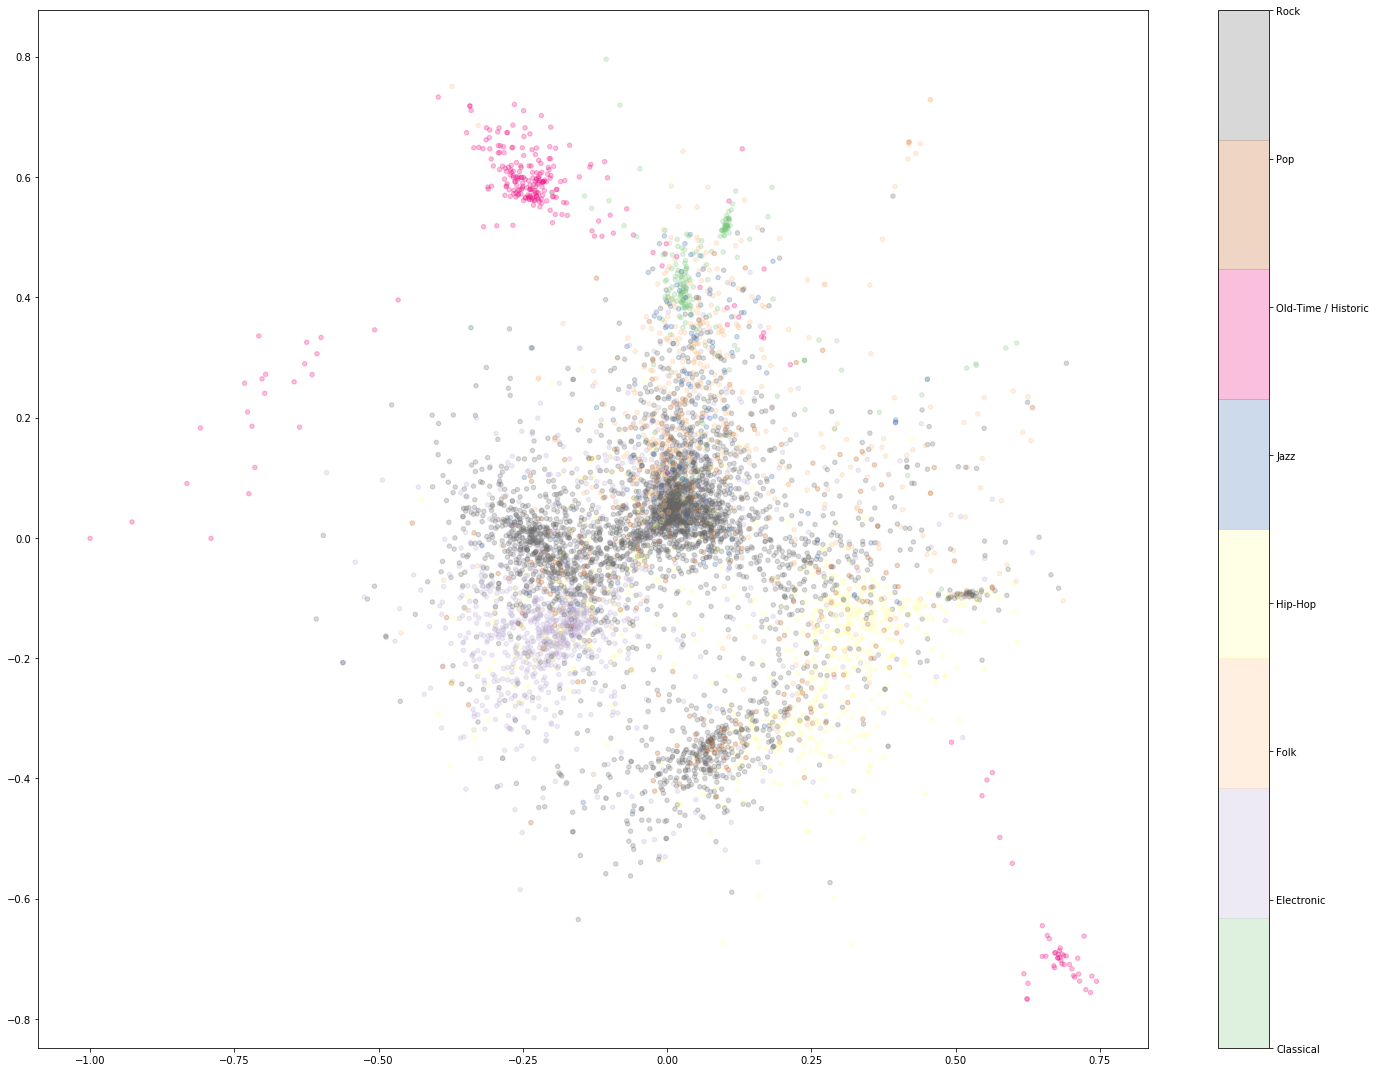

In [1377]:
plt.figure(figsize=(20,15))
nodes = nx.draw_networkx_nodes(GC, coords_gc, node_size=20, node_color=numeric_labels, alpha=0.25, cmap='Accent')
#nx.draw_networkx_edges(GC, coords_gc, alpha=0.1)
cbar = plt.colorbar(nodes)
cbar.ax.set_yticklabels(genre_labels.astype('category').cat.categories)
#plt.title("Genre repartition of the graph based only on echonest audio features using a spring layout, clustering coefficient ={:.5f}".format(nx.average_clustering(GC)))
plt.tight_layout()
filename = "fig/cos/test_2.png"
plt.savefig(filename)
plt.show()

In [1759]:
genres_indices = gc_tracks.track.groupby('genre_top').indices

In [1820]:
mean_dist_intra_genre = []
mean_dist_extra_genre = []
for genre in genres_indices:
    subgraph_edges = GC.subgraph(gc_nodes[genres_indices[genre]]).edges.data('distance')
    mean_dist_intra_genre.append(np.mean([e[2] for e in subgraph_edges]))
    
    extra_edges = set(GC.edges(gc_nodes[genres_indices[genre]])) - set(GC.subgraph(gc_nodes[genres_indices[genre]]).edges)
    mean_dist_extra_genre.append(np.mean([GC.edges[e]['distance'] for e in extra_edges]))

In [1825]:
genre_distinction_coeff = np.divide(mean_dist_extra_genre, mean_dist_intra_genre).sum()
genre_distinction_coeff

8.431249147235075

In [1378]:
clustering_coeff = nx.average_clustering(GC)
clustering_coeff

0.3732056320849157

In [1196]:
with open('new_log.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(['filename', 'audio_coeff', 'temporal_coeff', 'features_coeff', 'threshold', 'clustering_coeff', 'genre_distinction_coeff'])
    writer.writerow([filename, audio_coeff, temporal_coeff, features_coeff, threshold, clustering_coeff, genre_distinction_coeff])

In [1379]:
for a in gc_tracks.artist.name.unique():
    print(a)

AWOL
Kurt Vile
Alec K. Redfearn & the Eyesores
Amoebic Ensemble
Arc and Sender
Argumentix
Ed Askew
Bad News Bats
Barnacled
Bird Names
Black Elk
Blah Blah Blah
Blanketship
Borful Tang
Celesteville
Chandeliers
Charles Manson
Chief Boima
Cinwaves
CoCoComa
DJ's of Mass Destruction
Dora Bleu
Double Dagger
Dragging an Ox Through Water
El Jesus De Magico
Ethan Persoff
Fanatic
Flying Luttenbachers
Food For Animals
The Functional Blackouts
Fursaxa
Fuzz Unlimited
Glove Compartment
Guinea Worms
Hall Of Fame
Hecuba
Here Comes A Big Black Cloud!!
Heroin UK
Human Host
I Am the Liquor
Illusion of Safety
Impediments
Jason Willett
King Kong Ding Dong
Kowloon Walled City
Kyle Bruckmann's Wrack
Lazy Magnet
LO MOdA
Lop
Lovely Little Girls
Lozenge
Lungs Of A Giant
Mahjongg
Mary Halvorson and Weasel Walter
Mayor Daley
Mike Rep and the Quotas
Mink Lungs
Minmae
Monoshock
Mors Ontologica
Mount Eerie
Mountain High
Necropolis
Newagehillbilly
Nicky Andrews
Olneyville Sound System
Padna
Phallic Suns
Pierced Arrows

In [1469]:
np.argwhere(sub_tracks.artist.name == 'White Fence')

array([[7522],
       [7523],
       [7524],
       [7525],
       [7526],
       [7527],
       [7528],
       [7529]])

In [1470]:
np.argwhere(sub_tracks.artist.name == 'Brian Jonestown Massacre')

array([[1818],
       [1819],
       [1820],
       [1821],
       [1822],
       [1823],
       [1824],
       [1825],
       [1826],
       [1827],
       [1828],
       [1829],
       [1830]])

In [1441]:
np.argwhere(sub_tracks.artist.name == 'Parquet Courts')

array([[8377],
       [8378],
       [8379],
       [8380],
       [8381],
       [8382]])

In [1385]:
gc_tracks[[('track', 'title'),('artist','name'),('track','genre_top')]][gc_tracks.artist.name == 'Brian Jonestown Massacre']

,track,artist,track
,title,name,genre_top
track_id,,,
7450,Whoever You Are,Brian Jonestown Massacre,Rock
7451,Nailing Honey To The Bee,Brian Jonestown Massacre,Rock
7452,Here It Comes,Brian Jonestown Massacre,Rock
7453,Yeah Yeah,Brian Jonestown Massacre,Rock
7454,Banter,Brian Jonestown Massacre,Rock
7455,Vacuum Boots,Brian Jonestown Massacre,Rock
7456,Who,Brian Jonestown Massacre,Rock
7457,Hide and Seek,Brian Jonestown Massacre,Rock


In [1698]:
start_track = 123
end_track = 2591

In [1699]:
gc_tracks[[('track', 'title'),('artist','name'),('track','genre_top')]].iloc[[start_track, end_track]]

,track,artist,track
,title,name,genre_top
track_id,,,
534,I Can See You,Charles Manson,Folk
16982,Har-You Theme,Har-You Percussion Group,Jazz


In [1700]:
dict_gc = dict(zip(gc_nodes,range(len(gc_nodes))))

In [1701]:
dirac = np.zeros(len(gc_nodes))
dirac[[dict_gc[start_track],dict_gc[end_track]]] = 1

In [1703]:
t = 10
signal = U @ ( np.exp(-t*eigvals) * (U.T @ dirac) )

In [1704]:
signal = normalized(signal)

In [1707]:
nx.set_edge_attributes(GC, name="cost", values={ k:v+smoothness(signal, k[0],k[1]) for (k,v) in nx.get_edge_attributes(GC, "distance").items() })

In [1708]:
smooth_playlist = nx.dijkstra_path(GC, s, t, weight='cost')
shortest_playlist = nx.dijkstra_path(GC, s, t, weight='distance')

In [1654]:
smooth_mean = []
shortest_mean = []
for i in tqdm_notebook(range(100)):
    s,t = np.random.choice(gc_nodes, size=2)
    
    dirac = np.zeros(len(gc_nodes))
    dirac[[dict_gc[s],dict_gc[t]]] = 1
    signal = U @ ( np.exp(-10*eigvals) * (U.T @ dirac) )
    signal = normalized(signal)
    
    nx.set_edge_attributes(GC, name="cost", values={ k:v+smoothness(signal, k[0],k[1]) for (k,v) in nx.get_edge_attributes(GC, "distance").items() })
    
    smooth_playlist = nx.dijkstra_path(GC, s, t, weight='cost')
    shortest_playlist = nx.dijkstra_path(GC, s, t, weight='distance')
    smooth_mean.append(np.mean([ GC.edges[e]['cost'] for e in list(zip(smooth_playlist[:-1],smooth_playlist[1:])) ]))
    shortest_mean.append(np.mean([ GC.edges[e]['cost'] for e in list(zip(shortest_playlist[:-1],shortest_playlist[1:])) ]))

In [1519]:
def smoothness_heuristic(i, j):
    if i < j:
        i, j = j, i
    ind = int(n_nodes*j - j*(j+1)/2 + i - 1 - j)
    return distances[ind] + 100*np.abs(signal[dict_gc[i]] - signal[dict_gc[j]])

In [1713]:
def smoothness(sig, i, j):
    return np.abs(sig[dict_gc[i]] - sig[dict_gc[j]])

In [1525]:
playlist = nx.astar_path(GC, start_track, end_track, heuristic=smoothness_heuristic, weight='distance')
playlist

[38, 1719, 6405, 8468, 7348]

In [1527]:
playlist = nx.dijkstra_path(GC, start_track, end_track, weight='distance')
playlist

[38, 5585, 959, 7348]

In [1581]:
smooth_mean = []
shortest_mean = []
for i in tqdm_notebook(range(100)):
    s,t = np.random.choice(gc_nodes, size=2)
    smooth_playlist = nx.astar_path(GC, s, t, heuristic=smoothness_heuristic, weight='distance')
    shortest_playlist = nx.dijkstra_path(GC, s, t, weight='distance')
    smooth_mean.append(distance_matrix[smooth_playlist[:-1],smooth_playlist[1:]].mean())
    shortest_mean.append(distance_matrix[shortest_playlist[:-1],shortest_playlist[1:]].mean())

In [1655]:
np.asarray(smooth_mean) - np.asarray(shortest_mean)

array([-0.07507403, -0.03336234,  0.        ,  0.        ,  0.        ,
       -0.22334253, -0.05084191, -0.08579117,  0.        , -0.0422001 ,
        0.        , -0.20959991,  0.        , -0.02078198, -0.0300069 ,
       -0.12557266, -0.17444594, -0.14716058, -0.03089524, -0.03432812,
       -0.01618569, -0.38303085,  0.        ,  0.        , -0.0433844 ,
       -0.09351395,  0.        ,  0.        , -0.10160118, -0.10028264,
       -0.05863422, -0.08196379,  0.        ,  0.        , -0.00567669,
        0.        , -0.01854981, -0.05358292,  0.        , -0.19579921,
        0.        ,  0.        , -0.02833738,  0.        , -0.05638358,
       -0.00618467,  0.        ,  0.01149513, -0.07344364,  0.        ,
        0.        , -0.09722425, -0.01855698,  0.        ,  0.        ,
        0.        , -0.12111716,  0.        , -0.01313287, -0.21611347,
        0.        ,  0.        , -0.04670091, -0.04238725,  0.        ,
       -0.02359476, -0.03406236,  0.        , -0.0138031 , -0.03

In [1656]:
print(np.mean(shortest_mean))
print(np.mean(smooth_mean))

0.23472469294725265
0.18545041298719475


In [1251]:
gc_tracks[[('track', 'title'),('artist','name'),('track','genre_top')]].iloc[playlist]

,track,artist,track
,title,name,genre_top
track_id,,,
49099,Harness (Live @ WFMU),White Fence,Rock
7459,Nevertheless,Brian Jonestown Massacre,Rock
17945,Last of the Frontiersmen,Dark Meat,Rock
7451,Nailing Honey To The Bee,Brian Jonestown Massacre,Rock


In [1270]:
playlist = nx.dijkstra_path(GC, start_track, end_track, weight='distance')
sub_tracks[[('track', 'title'),('artist','name'),('track','genre_top')]].iloc[playlist]

,track,artist,track
,title,name,genre_top
track_id,,,
49099,Harness (Live @ WFMU),White Fence,Rock
3619,Sylvie Says,Fallen Leaves,Rock
4214,"Time, Money, and Me",Skybombers,Rock
7451,Nailing Honey To The Bee,Brian Jonestown Massacre,Rock


In [1709]:
def g_to_gc(nodelist):
    return [ dict_gc[n] for n in nodelist ]

In [1710]:
shortest_color = np.zeros(len(gc_nodes))
shortest_color[g_to_gc(shortest_playlist)] = 1
smooth_color = np.zeros(len(gc_nodes))
smooth_color[g_to_gc(smooth_playlist)] = 1

In [1711]:
smooth_labels = {}
for song in smooth_playlist:
    smooth_labels[song] = sub_tracks.iloc[song].artist['name']

short_labels = {}
for song in shortest_playlist:
    short_labels[song] = sub_tracks.iloc[song].artist['name']

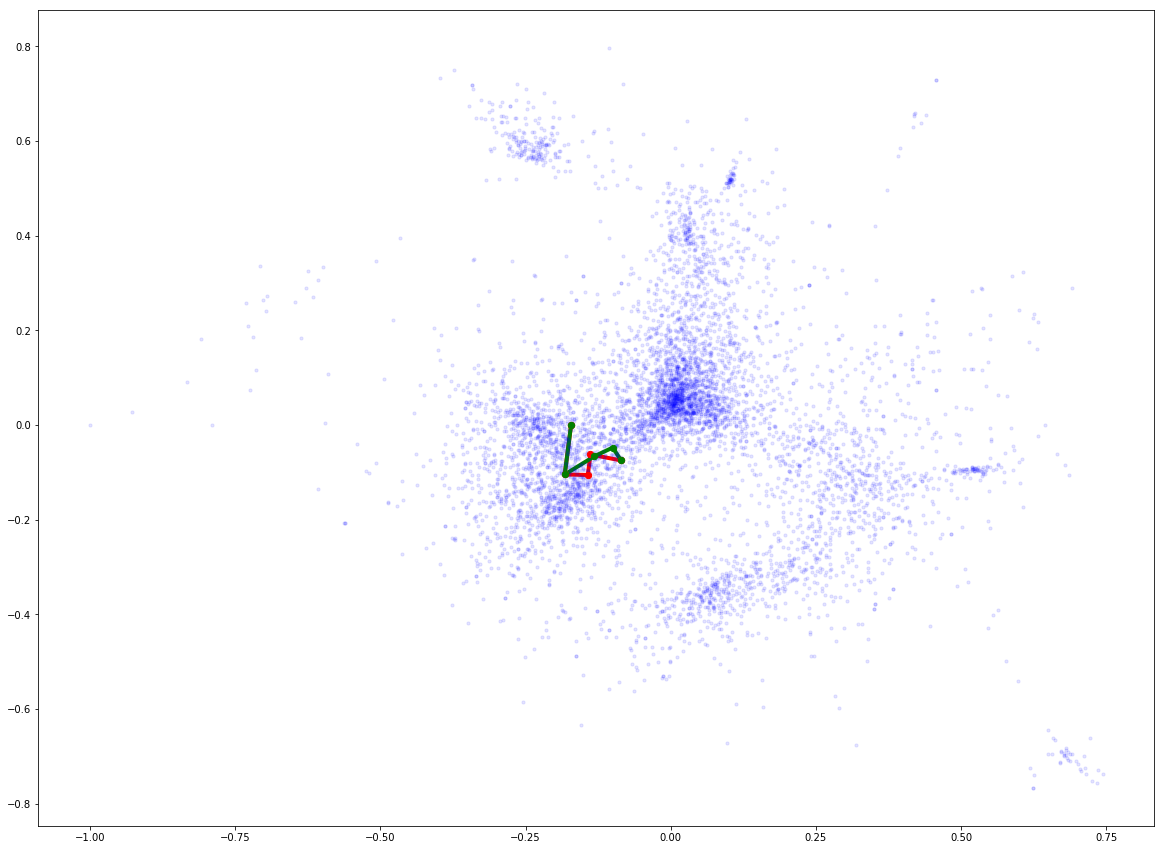

In [1712]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(GC, coords_gc, nodelist=gc_nodes, node_size=10, node_color='b', alpha=0.1)
nx.draw_networkx_nodes(GC, coords_gc, nodelist=smooth_playlist, node_size=40, node_color='r')
nx.draw_networkx_nodes(GC, coords_gc, nodelist=shortest_playlist, node_size=40, node_color='g')
#nx.draw_networkx_edges(GC, coords_gc, alpha=0.2)
nx.draw_networkx_edges(GC, coords_gc, edgelist=list(zip(smooth_playlist[:-1],smooth_playlist[1:])), edge_color='r', width=4)
nx.draw_networkx_edges(GC, coords_gc, edgelist=list(zip(shortest_playlist[:-1],shortest_playlist[1:])), edge_color='g', width=4)
#nx.draw_networkx_labels(GC, coords_gc, short_labels, font_size=16)
#nx.draw_networkx_labels(GC, coords_gc, smooth_labels, font_size=16)
plt.show()

In [1026]:
bjm = list(np.argwhere(gc_tracks.artist.name == 'Brian Jonestown Massacre').flatten())
pq = list(np.argwhere(gc_tracks.artist.name == 'Parquet Courts').flatten())

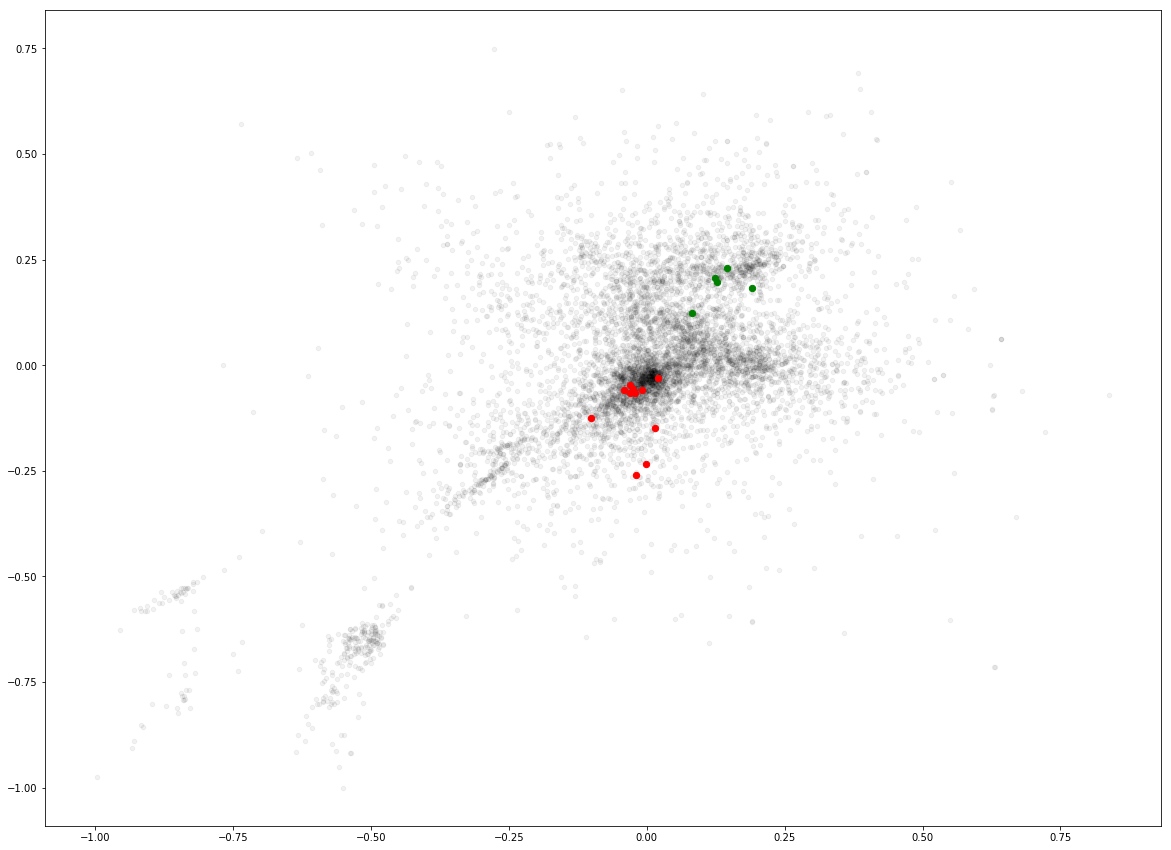

In [1029]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(GC, coords_gc, node_size=20, node_color='k', alpha=0.05)
nx.draw_networkx_nodes(GC, coords_gc, nodelist=bjm, node_size=40, node_color='r')
nx.draw_networkx_nodes(GC, coords_gc, nodelist=pq, node_size=40, node_color='g')
#nx.draw_networkx_edges(GC, coords_gc, alpha=0.2)
#nx.draw_networkx_edges(GC, coords_gc, edgelist=list(zip(playlist[:-1],playlist[1:])), edge_color='r', width=4)
#nx.draw_networkx_labels(GC, coords_gc, labels, font_size=16)
plt.show()

NetworkXError: Node 7 has no position.

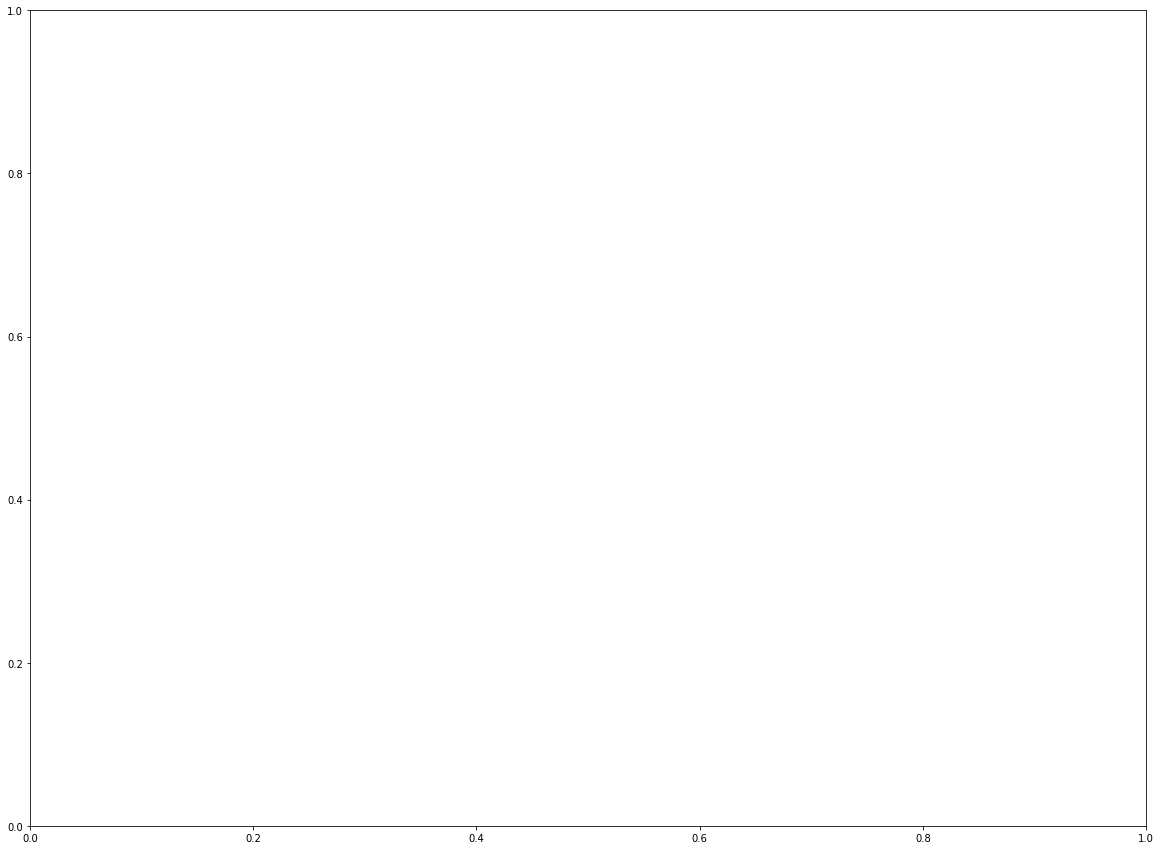

In [1853]:
plt.figure(figsize=(20,15))
nodes = nx.draw_networkx_nodes(GC, coords_gc, node_size=20, node_color=signal, alpha=0.5, cmap="Blues")
nx.draw_networkx_nodes(GC, coords_gc, node_size=20, nodelist=[g_to_gc[start_track],g_to_gc[end_track]], color='r')
plt.colorbar(nodes)
plt.show()

In [ ]:
def smoothest_past(O, C, start, end):
    p = start
    C.append(p)
    curr_dist = 0
    while(p != end):
        O.add(adjacentVerts(GC, p, curr_dist, end))
        k = O.pop()
        C.append(k)
        curr_dist += graph.edges[p, k]['distance']
        p = k

In [ ]:
def adjacentVerts(graph, n, curr_dist, t):
    adj = []
    for neighbor in graph.neighbors(n):
        g = curr_dist + graph.edges[n, neighbor]['distance']
        f = 
        h =
        w = g + f + h
        adj.append()
    return sorted(adj)

In [1103]:
for n in GC.neighbors(6613):
    print(n)

44
327
377
383
388
399
405
561
624
639
661
897
909
929
1097
1112
1152
1159
1163
1238
1313
1430
1612
1761
1762
1763
1845
1858
1999
2273
2275
2645
2731
2732
2734
2826
2938
2939
2940
2944
2946
2947
2948
3293
3793
3795
3798
3801
3873
3875
3933
3935
4018
4240
4583
4591
4593
4677
4684
4930
4994
4995
4996
5016
5216
5257
5398
5435
5662
5676
5677
5900
5903
5905
5910
5939
6246
6263
6284
6293
6446
6447
6614
6616
6617
6620
6646
6838
7733
7818


In [1106]:
GC.edges[6613,44]['weight']

0.9527770201212039